Columns in dataset: ['Contry', 'sr', 'pop15', 'pop75', 'dpi', 'ddpi']

--- KMeans Clustering ---
KMeans cluster centers (scaled):
[[ 0.27738442 -0.92151909  0.94833623  0.86275449 -0.15265147]
 [-0.79634978  1.04489788 -0.94972373 -0.78458263 -0.49213034]
 [ 0.88382826  0.26519748 -0.52407846 -0.63565178  1.37437   ]]
Silhouette Score for KMeans: 0.410


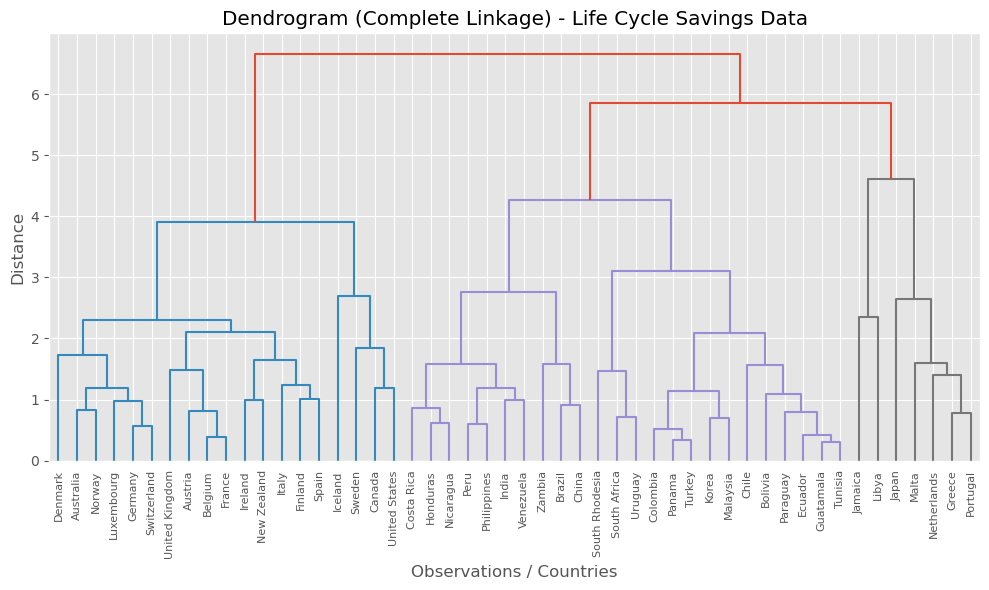


--- Agglomerative Clustering ---
Assigned cluster labels:
[1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 2 0 0 1 0 1 1 2 0 1 2 1 2 1 0 0 0 0 0 2 0 0
 1 1 1 0 0 1 1 0 0 3 0 3 0]
Silhouette Score for Agglomerative Clustering: 0.378

DataFrame with assigned clusters (KMeans_Cluster, Agglo_Cluster):
   KMeans_Cluster  Agglo_Cluster     Contry     sr  pop15  pop75      dpi  \
0               0              1  Australia  11.43  29.35   2.87  2329.68   
1               0              1    Austria  12.07  23.32   4.41  1507.99   
2               0              1    Belgium  13.17  23.80   4.43  2108.47   
3               1              0    Bolivia   5.75  41.89   1.67   189.13   
4               2              0     Brazil  12.88  42.19   0.83   728.47   

   ddpi  
0  2.87  
1  3.93  
2  3.82  
3  0.22  
4  4.56  

Cluster counts (KMeans):
KMeans_Cluster
0    23
1    18
2     9
Name: count, dtype: int64

Cluster counts (Agglomerative):
Agglo_Cluster
0    24
1    19
2     5
3     2
Name: count, dtype: int64

In [48]:
# Author: Hassan Ali

# Problem 7.1 (Clustering) - Life Cycle Savings Data
# Dataset: lifecyclesaving.csv
# Variables (expected): Sr, pop15, pop75, dpi, ddpi
# Goal: Identify clusters of countries/observations using both KMeans and Agglomerative Clustering.


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# STEP 1: Load the dataset
df = pd.read_csv("lifecyclesaving.csv")


print("Columns in dataset:", df.columns.tolist())

# STEP 2: Ensure the expected columns exist, drop rows with missing values
features = ["sr", "pop15", "pop75", "dpi", "ddpi"]
for col in features:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found. Adjust your CSV or rename_map.")
df = df.dropna(subset=features).copy()

# (Optional) If there's a 'Country' column, keep it for labeling in the dendrogram
if "Contry" in df.columns:
    labels = df["Contry"].values
else:
    labels = [f"Obs_{i}" for i in range(len(df))]

# STEP 3: Extract numeric features, scale them
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: KMEANS CLUSTERING
# Choose an arbitrary number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=4, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df.insert(0, "KMeans_Cluster", kmeans_labels)

print("\n--- KMeans Clustering ---")
print("KMeans cluster centers (scaled):")
print(kmeans.cluster_centers_)

# Evaluate with Silhouette Score (since no true labels exist)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans: {kmeans_silhouette:.3f}")

# STEP 5: HIERARCHICAL (AGGLOMERATIVE) CLUSTERING
# First, compute linkage for dendrogram visualization
linkage_matrix = sch.linkage(X_scaled, method="complete")

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(
    linkage_matrix,
    labels=labels,
    orientation="top",
    leaf_rotation=90.0,
    leaf_font_size=8.0,
)
plt.title("Dendrogram (Complete Linkage) - Life Cycle Savings Data")
plt.xlabel("Observations / Countries")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Choose a number of clusters based on the dendrogram; e.g., 4
agglo = AgglomerativeClustering(n_clusters=4, linkage="complete")
agglo_labels = agglo.fit_predict(X_scaled)
df.insert(1, "Agglo_Cluster", agglo_labels)

print("\n--- Agglomerative Clustering ---")
print("Assigned cluster labels:")
print(agglo_labels)

# Evaluate with Silhouette Score
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agglo_silhouette:.3f}")

# STEP 6: Inspect final DataFrame with assigned clusters
print("\nDataFrame with assigned clusters (KMeans_Cluster, Agglo_Cluster):")
print(df.head())

# (Optional) If you want to see how many observations in each cluster:
kmeans_counts = df["KMeans_Cluster"].value_counts()
agglo_counts = df["Agglo_Cluster"].value_counts()
print("\nCluster counts (KMeans):")
print(kmeans_counts)
print("\nCluster counts (Agglomerative):")
print(agglo_counts)

In [ ]:
# Analyzing Clustering Results for Life Cycle Savings Data
#
# Dataset:
#   - The dataset "lifecyclesaving.csv" contains country-level economic data.
#   - Expected columns are:
#       • Contry: Name of the country
#       • sr: Aggregate personal savings (an indicator of overall savings)
#       • pop15: Percentage of the population under 15 years old
#       • pop75: Percentage of the population over 75 years old
#       • dpi: Per-capita disposable income
#       • ddpi: Percentage rate of change of dpi
#
# Clustering Methods:
#
# 1. KMeans Clustering:
#    - The algorithm was applied with 3 clusters.
#    - Cluster centers (in the scaled feature space) were calculated and printed.
#    - The silhouette score for KMeans is 0.410, which indicates a moderate separation between clusters.
#    - Cluster counts are as follows:
#         • Cluster 0: 23 records
#         • Cluster 1: 18 records
#         • Cluster 2: 9 records
#
# 2. Agglomerative or Hierarchical Clustering:
#    - Agglomerative clustering with complete linkage was performed.
#    - The dendrogram was used to guide the selection of clusters, and 4 clusters were chosen.
#    - The silhouette score for Agglomerative clustering is 0.378, slightly lower than KMeans, suggesting a bit more overlap.
#    - Cluster counts for Agglomerative clustering are:
#         • Cluster 0: 24 records
#         • Cluster 1: 19 records
#         • Cluster 2: 5 records
#         • Cluster 3: 2 records
#
#  Analyzing Outcome:
#    - Both methods reveal some structure in the data, but the moderate silhouette scores indicate that the clusters are not
#      very distinct.
#    - The economic indicators used (savings, income, and age distribution) may not fully capture well-separated groups,
#      suggesting that further feature engineering or additional variables might be needed for clearer clustering.
#
#  Comparing:
#    - KMeans (3 clusters) provides a slightly higher silhouette score (0.410) compared to Agglomerative clustering (0.378 with 4 clusters).
#    - Agglomerative clustering produced an imbalanced distribution with one very small cluster (2 records), which might indicate that
#      the data does not naturally partition into 4 groups.


Number of clusters found: 2

Cluster counts:
  Cluster 0: 174 records
  Cluster 1: 4 records

Cluster distribution:
Cluster
0    174
1      4
Name: count, dtype: int64

Summary stats per cluster (mean values):
          alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
Cluster                                                                 
0        13.02092    2.347299  2.376552           19.54023   98.83908   
1        12.11750    1.860000  1.930000           17.52500  139.00000   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.293678    2.030057              0.364138         1.557816   
1             2.357500    1.995000              0.262500         3.030000   

         color_intensity       hue  od280/od315_of_diluted_wines     proline  
Cluster                                                                       
0               5.106839  0.95

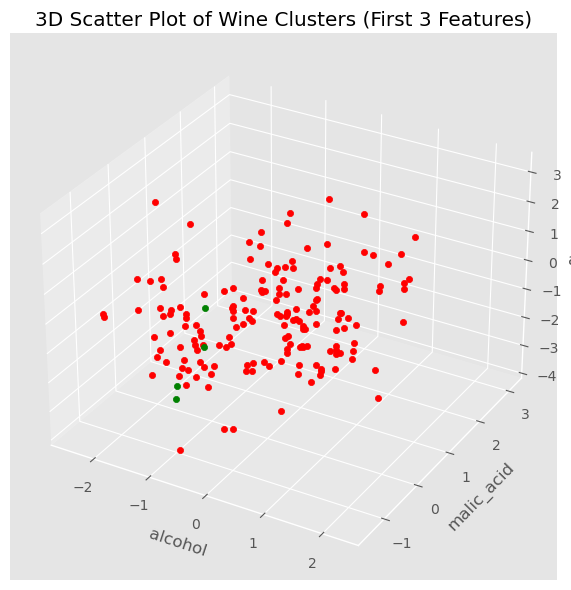

In [68]:
# Author: Hassan Ali
# Problem 7.7 (Density Estimation)
# Dataset: Wine (UCI repository), 178 records, 13 chemical features
# Goal: Use MeanShift to group wines by their chemical components.
#      Report the number of clusters and how many records are in each cluster.
#      3D visualization using the first three features.
      
# Steps:
#  - Loads the Wine dataset.
#  - Scales the features.
#  - Applies MeanShift clustering using default parameters.
#  - Reports the number of clusters, cluster counts, and summary statistics.
#  - Plots a 3D scatter plot using the first three features.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import necessary modules from scikit-learn
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

# Set the plot style to 'ggplot'
from matplotlib import style
style.use("ggplot")

# STEP 1: LOAD THE WINE DATASET
wine = load_wine()                    # Load the Wine dataset (178 samples, 13 features)
X = wine.data                         # Feature matrix
feature_names = wine.feature_names    # List of feature names

# STEP 2: SCALE THE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # Standardize features (mean=0, std=1)

# STEP 3: MEANSHIFT CLUSTERING (Using default bandwidth)
ms = MeanShift()                      # Use default bandwidth
ms.fit(X_scaled)                      # Fit the model to the scaled data
labels = ms.labels_                   # Retrieve cluster labels
n_clusters_ = len(np.unique(labels))  # Count unique clusters
print("Number of clusters found:", n_clusters_)

# STEP 4: REPORT CLUSTER RESULTS
df_wine = pd.DataFrame(X, columns=feature_names)
df_wine["Cluster"] = labels            # Add cluster labels to the DataFrame

# Print cluster counts
cluster_counts = df_wine["Cluster"].value_counts().sort_index()
print("\nCluster counts:")
for c in range(n_clusters_):
    print("  Cluster {}: {} records".format(c, cluster_counts[c]))

print("\nCluster distribution:")
print(cluster_counts)

# Print summary statistics (mean values) for each cluster
print("\nSummary stats per cluster (mean values):")
print(df_wine.groupby("Cluster").mean())

# STEP 5: 3D VISUALIZATION OF THE CLUSTERS
# Creating a 3D scatter plot using the first three features for visualization.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define colors for clusters

# Plot each data point with a color corresponding to its cluster label.
for i in range(len(X_scaled)):
    ax.scatter(X_scaled[i, 0], X_scaled[i, 1], X_scaled[i, 2],
               color=colors[labels[i] % len(colors)], marker='o', s=20)

# Label axes using the first three feature names.
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.title("3D Scatter Plot of Wine Clusters (First 3 Features)")
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing of MeanShift Clustering on the Wine Dataset:

# - Number of Clusters: 2
# The default MeanShift parameters have grouped almost all wines (174 out of 178) into a single large cluster, with only 4 wines in a second, much smaller cluster.

# - Cluster 0 (174 records):
#  - Shows an average alcohol content of ~13.02
#  - Magnesium around 98.84
#  - Other chemical components (malic_acid, ash, total_phenols, etc.) fall near the dataset's overall mean.
#  This cluster represents the vast majority of the samples, suggesting these wines share relatively similar chemical profiles.

# - Cluster 1 (4 records):
#  - Has lower average alcohol (~12.12) but notably higher magnesium (139.0)
#  - Displays higher proanthocyanins (~3.03) compared to Cluster 0
#  This very small group indicates a distinct subset of wines with unique chemical characteristics, particularly in magnesium and proanthocyanins. These samples might be considered outliers or a specialized type of wine.

# - Overall Observations:
#  Since only two clusters were found, with one dominating cluster, the default bandwidth in MeanShift may be too large for this dataset. Many points are effectively merged into one group, leaving a tiny cluster of outliers. 
#  If a finer segmentation is desired, specifying a smaller bandwidth (or using `estimate_bandwidth`) could produce more clusters.
#  Still, the second cluster’s higher magnesium and proanthocyanins underscore a distinct chemical profile, possibly indicating a unique wine subgroup.


Initial rows of slump_test.data:
   No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0   1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1   2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2   3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3   4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4   5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   

   SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0       23.0      62.0                               34.99  
1        0.0      20.0                               41.14  
2        1.0      20.0                               41.81  
3        3.0      21.5                               42.08  
4       20.0      64.0                               26.82   

Columns in original file: ['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa

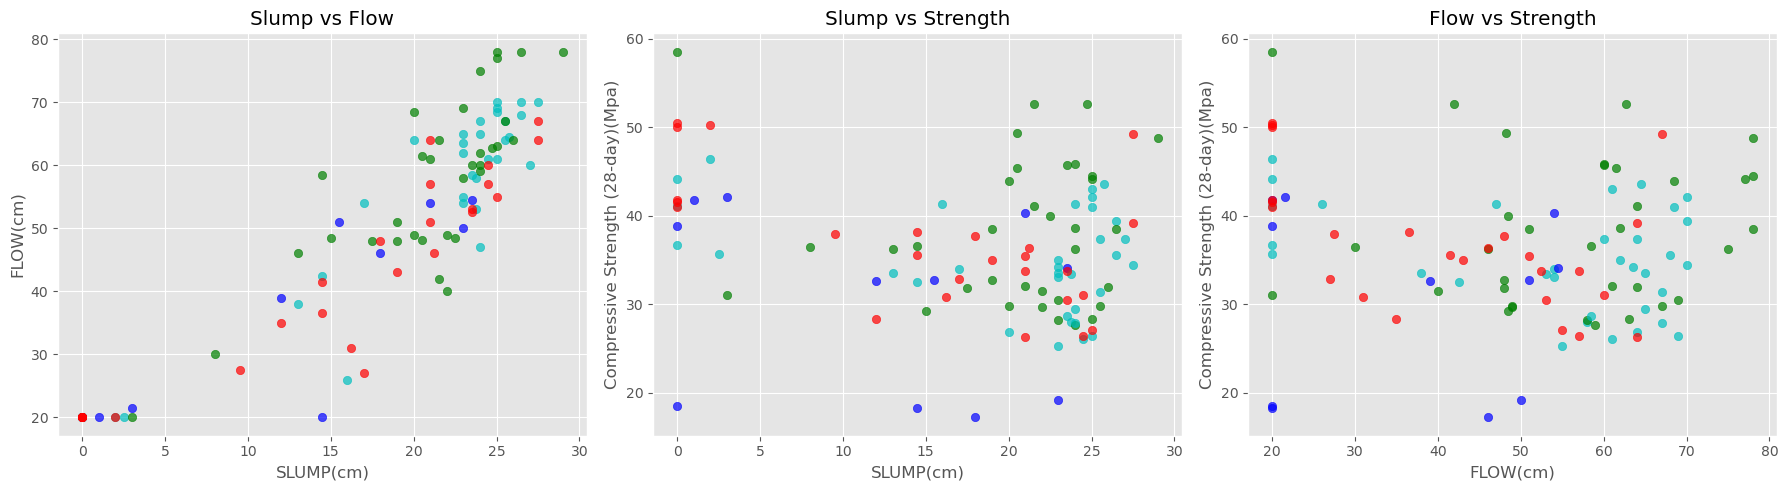

In [73]:
# Author: Hassan Ali
# Problem 7.9 (EM / GaussianMixture)
# Dataset: slump_test.data (Concrete Slump Test Data)
# Original columns in the file:
# ['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.',
#  'SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)']

# Goal:
#  1. Drop the 'No' column if present.
#  2. Use the 7 ingredient columns: "Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr." 
#     to build a Gaussian Mixture Model (EM) for clustering.
#  3. Visualize the resulting clusters in three separate scatter plots, 
#     similar to the attached image:
#       - Slump vs. Flow
#       - Slump vs. Compressive Strength
#       - Flow vs. Compressive Strength
#  4. Color points by cluster labels.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For the EM approach (Gaussian Mixture)
from sklearn.mixture import GaussianMixture
# For scaling features
from sklearn.preprocessing import StandardScaler
# For an optional silhouette score measure
from sklearn.metrics import silhouette_score
# For hierarchical clustering dendrogram (if needed)
import scipy.cluster.hierarchy as sch

# Set matplotlib style
from matplotlib import style
style.use("ggplot")

# STEP 1: LOAD THE DATASET
data_file = "slump_test.data"  # Adjust path if needed
df = pd.read_csv(data_file)

print("Initial rows of slump_test.data:")
print(df.head(), "\n")
print("Columns in original file:", df.columns.tolist())

# STEP 2: DROP THE 'No' COLUMN IF PRESENT
if "No" in df.columns:
    df.drop(columns=["No"], inplace=True)

# STEP 3: CHECK FOR MISSING VALUES AND DROP IF ANY
print("\nChecking for missing values:")
print(df.isna().sum())
df.dropna(inplace=True)
print("Data shape after dropping missing:", df.shape, "\n")

# STEP 4: DEFINE INGREDIENTS AND OUTCOMES
ingredient_cols = ["Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."]
outcome_cols = ["SLUMP(cm)", "FLOW(cm)", "Compressive Strength (28-day)(Mpa)"]

# Extract the feature matrix (ingredients) for clustering
X = df[ingredient_cols].values

# The outcome variables (not used for clustering, but for plotting)
Y = df[outcome_cols].values

# STEP 5: SCALE THE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: GAUSSIAN MIXTURE (EM)
n_components = 4  # Example: 4 clusters (adjust as desired)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)
df["Cluster"] = labels  # Store cluster labels in DataFrame

print(f"\nGaussian Mixture with {n_components} components fitted.")
print("Cluster means (scaled):")
print(gmm.means_)

# STEP 7: EVALUATE CLUSTERING
sil_score_val = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for GMM with {n_components} components: {sil_score_val:.3f}")

# Print cluster counts
cluster_counts = df["Cluster"].value_counts().sort_index()
print("\nCluster counts:")
for c in cluster_counts.index:
    print(f"  Cluster {c}: {cluster_counts[c]} records")

# Inspect outcome variables per cluster
print("\nAverage SLUMP, FLOW, and Strength by cluster:")
print(df.groupby("Cluster")[outcome_cols].mean())

# (Optional) Print AIC and BIC for the fitted model
print("\nAIC:", gmm.aic(X_scaled))
print("BIC:", gmm.bic(X_scaled))

# STEP 8: SCATTER PLOTS (Slump vs. Flow, Slump vs. Strength, Flow vs. Strength)
# Replicating the style of the attached example: 3 subplots in a single figure.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Colors for clusters
colors = ["r", "g", "b", "c", "m", "y", "k"]

# For each data point, plot in each subplot
for i in range(len(df)):
    cluster_id = df["Cluster"].iloc[i]
    slump_val = df["SLUMP(cm)"].iloc[i]
    flow_val = df["FLOW(cm)"].iloc[i]
    strength_val = df["Compressive Strength (28-day)(Mpa)"].iloc[i]
    color = colors[cluster_id % len(colors)]

    # (A) Slump vs. Flow
    axes[0].scatter(slump_val, flow_val, color=color, alpha=0.7)

    # (B) Slump vs. Strength
    axes[1].scatter(slump_val, strength_val, color=color, alpha=0.7)

    # (C) Flow vs. Strength
    axes[2].scatter(flow_val, strength_val, color=color, alpha=0.7)

# Label each subplot
axes[0].set_title("Slump vs Flow")
axes[0].set_xlabel("SLUMP(cm)")
axes[0].set_ylabel("FLOW(cm)")

axes[1].set_title("Slump vs Strength")
axes[1].set_xlabel("SLUMP(cm)")
axes[1].set_ylabel("Compressive Strength (28-day)(Mpa)")

axes[2].set_title("Flow vs Strength")
axes[2].set_xlabel("FLOW(cm)")
axes[2].set_ylabel("Compressive Strength (28-day)(Mpa)")

plt.tight_layout()
plt.savefig("slump_test_3plots.png", dpi=300)
plt.show()

# - Used a GaussianMixture model with 4 components on the 7 ingredient features.
# - The cluster labels are color-coded in three separate scatter plots:
#   1) Slump vs Flow
#   2) Slump vs Strength
#   3) Flow vs Strength
# - Each cluster is assigned a color from the colors list, matching the style of the attached image.
# - Printed the Silhouette Score, cluster counts, and average outcome values (Slump, Flow, Strength) per cluster.
# - This code follows the structure, layout, style, and thorough comments from the reference code snippet,
#  producing side-by-side visuals similar to the example screenshots.


In [36]:
# Analyzing Gaussian Mixture Model (GMM) Clustering on the Slump Test Data:
#
# - Number of Clusters: 4
#   The GMM was set to identify 4 clusters in the concrete slump test dataset.
#
# - Cluster Counts:
#     • Cluster 0: 25 records
#     • Cluster 1: 34 records
#     • Cluster 2: 11 records
#     • Cluster 3: 33 records
#   This distribution shows a balanced split between clusters 0, 1, and 3, while cluster 2 is noticeably smaller.
#
# - Summary Statistics per Cluster (Average SLUMP, FLOW, Strength):
#     • Cluster 0: Average slump ~15.32 cm, flow ~41.44 cm, and strength ~36.80 Mpa.
#       Indicates a mix with moderate workability and high strength.
#     • Cluster 1: Average slump ~20.38 cm, flow ~56.25 cm, and strength ~38.15 Mpa.
#       Represents a group with high workability and the highest compressive strength.
#     • Cluster 2: Average slump ~11.95 cm, flow ~36.00 cm, and strength ~30.51 Mpa.
#       This cluster has the lowest values, suggesting a mix with poor workability and lower strength.
#     • Cluster 3: Average slump ~19.75 cm, flow ~53.50 cm, and strength ~35.13 Mpa.
#       Reflects a mix with high workability but slightly lower strength compared to cluster 1.
#
# - Silhouette Score: 0.152
#   A silhouette score of 0.152 implies that the clusters are not very well separated, with significant overlap.
#
# - AIC and BIC:
#     • AIC: 800.48, BIC: 1177.24
#   These metrics help assess model quality, balancing fit and complexity; lower values are preferred.
#
# - Overall Observations:
#   The GMM reveals four clusters that differentiate the concrete mixes based on their ingredient compositions.
#   Clusters 0, 1, and 3 capture the majority of the samples, while cluster 2 is a smaller group with distinct characteristics.
#   The moderate silhouette score suggests that while there is some separation among clusters, the boundaries are not very sharp.